# Interpretacja modelu
Zbiór danych: https://www.kaggle.com/datasets/fedesoriano/wind-speed-prediction-dataset

Będziemy korzystać z tego samego zbioru danych.

In [1]:
from  sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
os.chdir('../')

In [3]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [4]:
# Wczytanie zbiorów z poprzednich zajęć
train_x = pd.read_csv('data/wind_train_x.csv')
test_x = pd.read_csv('data/wind_test_x.csv')
train_y = pd.read_csv('data/wind_train_y.csv')
test_y = pd.read_csv('data/wind_test_y.csv')

In [4]:
del train_x['Unnamed: 0']
del test_x['Unnamed: 0']
del train_y['Unnamed: 0']
del test_y['Unnamed: 0']

In [5]:
# Estymacja modelu
model = LinearRegression().fit(train_x,train_y)

In [10]:
# współczynniki
model.coef_

array([[-2.30948604e+03,  1.70923724e-03, -1.09008918e-01,
         1.12826303e+00,  5.43959525e-02, -4.02147966e-02,
         1.41304788e-04,  2.68382408e-02]])

In [11]:
# Nazwy zmiennych
model.feature_names_in_

array(['RAIN_inverse', 'T.MAX_3', 'T.MAX_2', 'T.MAX', 'T.MAX_T.MIN',
       'T.MIN_2', 'T.MIN_3', 'T.MIN'], dtype=object)

In [13]:
# Jeden współczynnik
model.coef_[0][0]

np.float64(-2309.4860432702462)

In [ ]:
# rain_inverse = 1/ (rain+100)

In [17]:
# Interpretacja zmiennej 1/(rain+100)
coef = model.coef_[0][0]
print(f'Wzrost wartosci zmiennej rain_inverse o jednostkę, powoduje spadek siły wiatru o {abs(coef)}')


Wzrost wartosci zmiennej rain_inverse o jednostkę, powoduje spadek siły wiatru o 2309.4860432702462


In [18]:
train_x['RAIN_inverse'].describe()

count    3716.000000
mean        0.009889
std         0.000181
min         0.009132
25%         0.009852
50%         0.009990
75%         0.010000
max         0.010000
Name: RAIN_inverse, dtype: float64

In [19]:
df = pd.read_csv('data/wind_dataset.csv')

In [20]:
df['RAIN'].describe()

count    6574.000000
mean        1.885169
std         4.030529
min         0.000000
25%         0.000000
50%         0.200000
75%         2.000000
max        67.000000
Name: RAIN, dtype: float64

In [26]:
# przy założeniu, że TMin = 0 , TMAX=0 
rain = np.arange(0,67,step=1)
rain_inverse = 1/(rain+100)
y = rain_inverse * coef

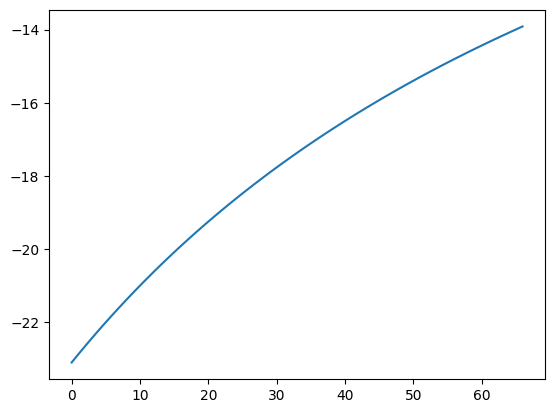

In [27]:
plt.plot(rain, y)
plt.show()